In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import cell2location

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs

D:\anaconda3\envs\cell2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config Inlinebackend.figure_format = 'retina'

In [3]:
from os import makedirs
from os.path import exists
results_folder = './result'
ref_run_name =f'{results_folder}/reference_signature'
run_name =f'{results_folder}/cell2location_map'

if not exists(ref_run_name):
    makedirs(ref_run_name)
if not exists(run_name ):
    makedirs(run_name)

In [4]:
adata_vis = sc.read_h5ad('./cache/adata1.clean.h5ad')

In [5]:
adata_vis.var

,n_cells,n_counts,mean_umi
A4GALT,23190,29923,1.290341
AAAS,4842,5815,1.200950
AACS,8800,11045,1.255114
AADAC,289,354,1.224913
AADACL3C,589,715,1.213922
...,...,...,...
mt-ND3,64837,103834,1.601462
mt-ND4,107633,213566,1.984206
mt-ND5,99420,180573,1.816264
mt-ND6,57977,80069,1.381048


In [6]:
adata_vis.var['MT_gene'] = [gene.startswith('mt-') for gene in adata_vis.var.index]
adata_vis.obsm['MT'] = adata_vis[:, adata_vis.var['MT_gene'].values].X.toarray()
adata_vis = adata_vis[:, ~adata_vis.var['MT_gene'].values]
adata_vis.var

,n_cells,n_counts,mean_umi,MT_gene
A4GALT,23190,29923,1.290341,False
AAAS,4842,5815,1.200950,False
AACS,8800,11045,1.255114,False
AADAC,289,354,1.224913,False
AADACL3C,589,715,1.213922,False
...,...,...,...,...
gga-mir-762,2,2,1.000000,False
gga-mir-7b,1,1,1.000000,False
gga-mir-9-2,1,1,1.000000,False
gga-mir-92-1,4,4,1.000000,False


In [7]:
id =pd.read_csv('./vis_var2.csv',header=0,index_col=0)
id

,n_cells,n_counts,mean_umi,MT_gene,ensembl_gene_id,external_gene_name
A4GALT,23190,29923,1.290341,False,ENSGALG00010012867,A4GALT
AAAS,4842,5815,1.200950,False,ENSGALG00010024389,AAAS
AACS,8800,11045,1.255114,False,ENSGALG00010020928,AACS
AADAC,289,354,1.224913,False,ENSGALG00010001708,AADAC
AADACL3C,589,715,1.213922,False,ENSGALG00010022178,AADACL3C
...,...,...,...,...,...,...
gga-mir-762,2,2,1.000000,False,ENSGALG00010026937,gga-mir-762
gga-mir-7b,1,1,1.000000,False,ENSGALG00010000264,gga-mir-7b
gga-mir-9-2,1,1,1.000000,False,ENSGALG00010007754,gga-mir-9-2
gga-mir-92-1,4,4,1.000000,False,ENSGALG00010006315,gga-mir-92-1


In [8]:
adata_vis.var =id
adata_vis.var.set_index ('ensembl_gene_id',drop=True,inplace=True)
adata_vis.var

,n_cells,n_counts,mean_umi,MT_gene,external_gene_name
ensembl_gene_id,,,,,
ENSGALG00010012867,23190,29923,1.290341,False,A4GALT
ENSGALG00010024389,4842,5815,1.200950,False,AAAS
ENSGALG00010020928,8800,11045,1.255114,False,AACS
ENSGALG00010001708,289,354,1.224913,False,AADAC
ENSGALG00010022178,589,715,1.213922,False,AADACL3C
...,...,...,...,...,...
ENSGALG00010026937,2,2,1.000000,False,gga-mir-762
ENSGALG00010000264,1,1,1.000000,False,gga-mir-7b
ENSGALG00010007754,1,1,1.000000,False,gga-mir-9-2


In [158]:
adata_vis.var['SYMBOL'] =adata_vis.var['external_gene_name']

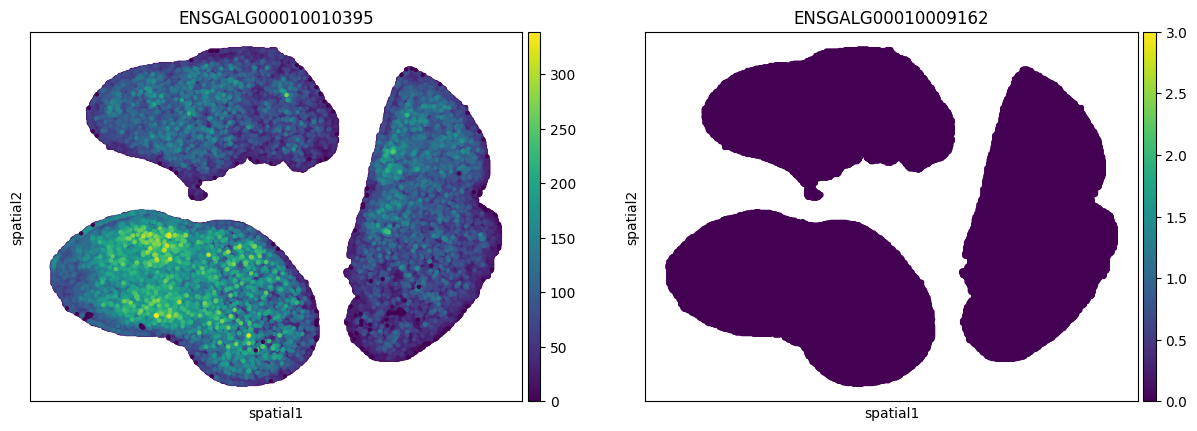

In [112]:
sc.pl.embedding(adata_vis, color=['ENSGALG00010010395','ENSGALG00010009162'], basis="spatial", size=40)

In [113]:
adata_vis.X.todense()[150:180,60:80]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

# 加载单细胞数据scRNA

In [46]:
adata_ref =sc.read_h5ad('./cache/sc_celltype.h5ad')
adata_ref

D:\anaconda3\envs\cell2loc_env\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 28211 × 21474
    obs: 'ID', 'Sample', 'batch', 'n_genes', 'n_counts', 'log_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'cluster_0.1', 'cluster_0.2', 'cluster_0.3', 'cluster_0.4', 'cluster_0.5', 'cluster_0.6', 'cluster_0.7', 'cluster_0.8', 'cluster_0.9', 'cluster_1.0', 'cluster_1.1', 'cluster_1.2', 'cluster_1.3', 'cluster_1.4', 'cluster_1.5', 'Celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Celltype_colors', 'Sample_colors', 'cluster_0.1', 'cluster_0.1_colors', 'cluster_0.2', 'cluster_0.2_colors', 'cluster_0.3', 'cluster_0.3_colors', 'cluster_0.4', 'cluster_0.4_colors', 'cluster_0.5', 'cluster_0.5_colors', 'cluster_0.6', 'cluster_0.

In [48]:
adata_ref.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
adata_ref.var['SYMBOL'] =adata_ref.var.index
adata_ref.var.set_index ('gene_ids',drop=True,inplace=True)

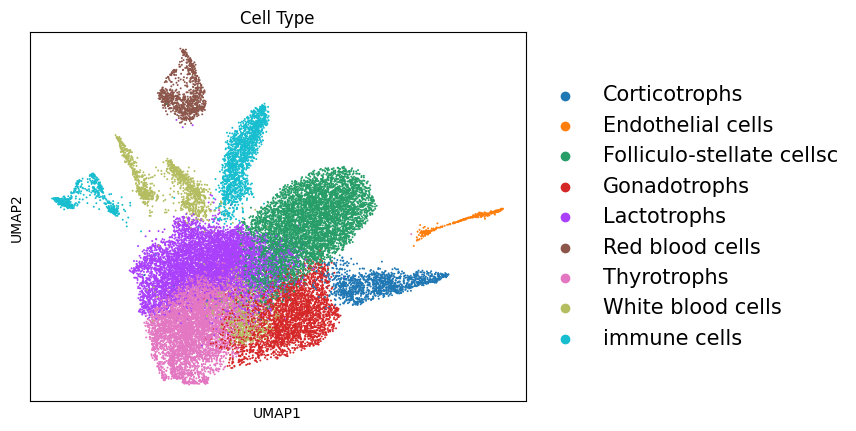

In [73]:
sc.pl.umap(adata_ref, color='Celltype',size=8,title='Cell Type',
               legend_fontsize=15, legend_fontoutline= 5,frameon=True)

D:\anaconda3\envs\cell2loc_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


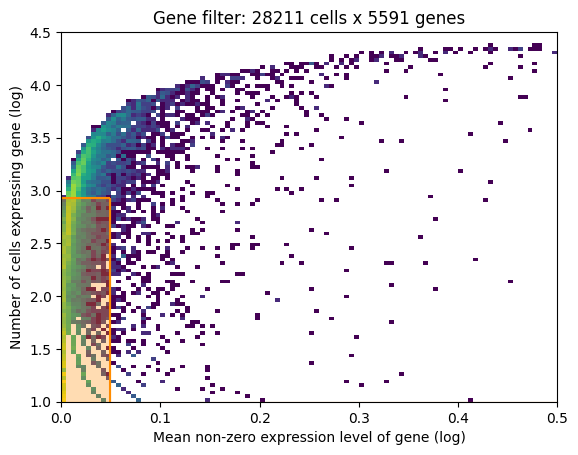

D:\anaconda3\envs\cell2loc_env\lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [75]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(adata_ref, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)
adata_ref = adata_ref[:, selected].copy()

In [81]:
adata_ref.obs['Method'] = '3GEX'

In [84]:
from cell2location.models import RegressionModel
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        batch_key='Sample',
                        labels_key='Celltype',
                        categorical_covariate_keys=['Method'],
                        continuous_covariate_keys=None
                                                  )

In [85]:
adata_ref.obs

,ID,Sample,batch,n_genes,n_counts,log_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,cluster_1.1,cluster_1.2,cluster_1.3,cluster_1.4,cluster_1.5,Celltype,_indices,_scvi_batch,_scvi_labels,Method
AAACCTGAGAAACCTA-1,1,female,0,645,1366.0,7.219642,645,1366.0,0.0,0.0,...,11,12,11,12,10,Folliculo-stellate cellsc,0,0,2,3GEX
AAACCTGAGACACGAC-1,1,female,0,668,1304.0,7.173192,668,1304.0,0.0,0.0,...,1,5,6,9,6,Thyrotrophs,1,0,6,3GEX
AAACCTGAGAGACGAA-1,1,female,0,833,1465.0,7.289610,833,1465.0,0.0,0.0,...,0,0,0,0,0,Folliculo-stellate cellsc,2,0,2,3GEX
AAACCTGAGCACAGGT-1,1,female,0,599,1188.0,7.080027,599,1188.0,0.0,0.0,...,1,5,12,11,6,Thyrotrophs,3,0,6,3GEX
AAACCTGAGCAGGTCA-1,1,female,0,349,438.0,6.082219,349,438.0,0.0,0.0,...,6,6,5,5,5,immune cells,4,0,8,3GEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTTGAC-1,0,male,1,709,1070.0,6.975414,709,1070.0,0.0,0.0,...,0,0,0,0,0,Folliculo-stellate cellsc,28206,1,2,3GEX
TTTGTCATCCAAGTAC-1,0,male,1,388,581.0,6.364751,388,581.0,0.0,0.0,...,2,4,2,2,2,Gonadotrophs,28207,1,3,3GEX
TTTGTCATCCGTAGTA-1,0,male,1,634,1083.0,6.987490,634,1083.0,0.0,0.0,...,3,1,4,3,3,Folliculo-stellate cellsc,28208,1,2,3GEX
TTTGTCATCCTCAATT-1,0,male,1,650,1225.0,7.110696,650,1225.0,0.0,0.0,...,2,4,2,2,2,Gonadotrophs,28209,1,3,3GEX


In [86]:
mod = RegressionModel(adata_ref)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.1.5.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample',
│   'labels_key': 'Celltype',
│   'categorical_covariate_keys': ['Method'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │ 28211 │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   9   │
│          n_vars          │ 5591  │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                   batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │   female   │          0          │
│                     │    male    │          1          │
└─────────────────────┴────────────┴─────────────────────┘

                           labels State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃        Categories         ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Celltype'] │       Corticotrophs       │          0          │
│                       │     Endothelial cells     │          1          │
│                       │ Folliculo-stellate cellsc │          2          │
│                       │       Gonadotrophs        │          3          │
│                       │        Lactotrophs        │          4          │
│                       │      Red blood cells      │          5          │
│                       │        Thyrotrophs        │          6          │
│                       │     White blood cells     │          7          │
│                       │       immune cells        │          8          │
└───────────────────────┴───────────────────────────┴─────────────────────┘

          extra_categorical_covs State Registry           
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Method'] │    3GEX    │          0          │
│                     │            │                     │
└─────────────────────┴────────────┴─────────────────────┘

In [89]:
mod.train(max_epochs=250)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
D:\anaconda3\envs\cell2loc_env\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
D:\anaconda3\envs\cell2loc_env\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Epoch 250/250: 100%|██████████████████████████████████| 250/250 [1:06:13<00:00, 16.85s/it, v_num=1, elbo_train=4.99e+7]

`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████████████████████████████| 250/250 [1:06:13<00:00, 15.90s/it, v_num=1, elbo_train=4.99e+7]


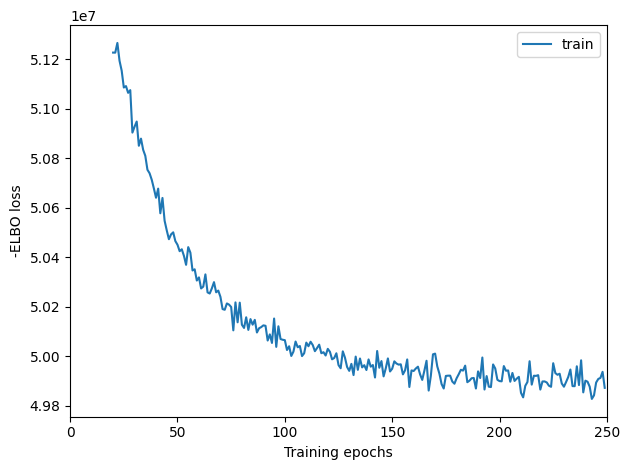

In [90]:
mod.plot_history(20)

In [93]:
adata_ref = mod.export_posterior(
    adata_ref, sample_kwargs={'num_samples': 1000, 
                              'batch_size': 2500},
    export_slot = 'mod',
    add_to_varm = ['means','stds','q05','q95'],
   scale_average_detection =True
)
mod.save(f"{ref_run_name}", overwrite=True)
adata_file = f"{ref_run_name}/sc.h5ad"
adata_ref.write(adata_file)
adata_file

Sampling global variables, sample: 100%|█████████████████████████████████████████████| 999/999 [01:25<00:00, 11.71it/s]


'./result/reference_signature/sc.h5ad'

In [96]:
adata_ref.uns['mod'].keys()

dict_keys(['model_name', 'date', 'factor_filter', 'factor_names', 'var_names', 'obs_names', 'post_sample_means', 'post_sample_stds', 'post_sample_q05', 'post_sample_q95'])

In [98]:
adata_ref.uns['mod']['post_sample_means'].keys()

dict_keys(['per_cluster_mu_fg', 'detection_tech_gene_tg', 'detection_mean_y_e', 's_g_gene_add_alpha_hyp', 's_g_gene_add_mean', 's_g_gene_add_alpha_e_inv', 's_g_gene_add', 'alpha_g_phi_hyp', 'alpha_g_inverse'])

In [100]:
adata_ref.uns['mod']['post_sample_means']['per_cluster_mu_fg'].shape

(9, 5591)

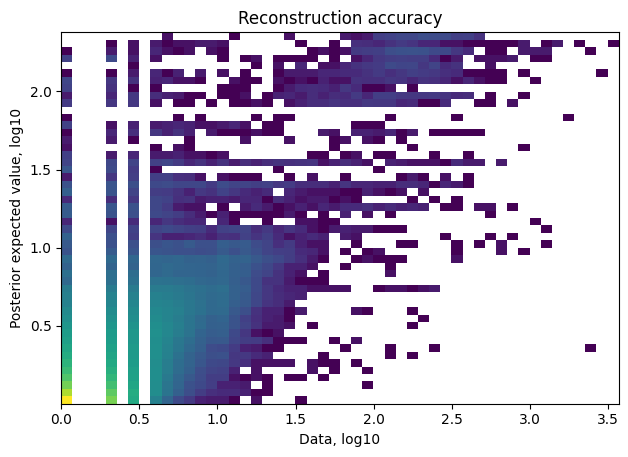

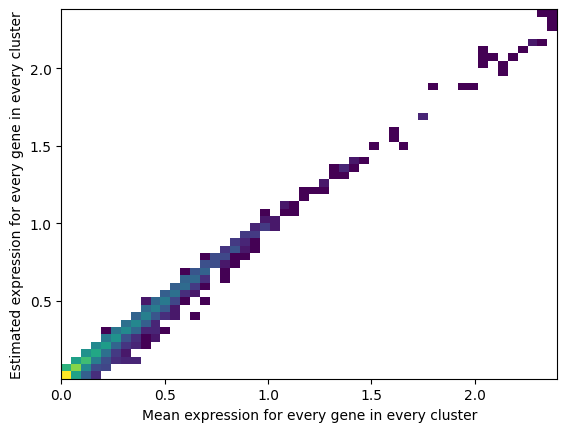

In [101]:
mod.plot_QC()

In [9]:
adata_vis = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata_vis.obs['sample'] = list(adata_vis.uns['spatial'].keys())[0]

100%|█████████████████████████████████████████████████████████████████████████████| 7.86M/7.86M [02:00<00:00, 68.4kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 29.3M/29.3M [30:54<00:00, 16.6kB/s]
D:\anaconda3\envs\cell2loc_env\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda3\envs\cell2loc_env\lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [171]:
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

,Corticotrophs,Endothelial cells,Folliculo-stellate cellsc,Gonadotrophs,Lactotrophs
gene_ids,,,,,
ENSGALG00010005414,0.057817,0.029265,0.045980,0.055506,0.073334
ENSGALG00010007123,0.014546,0.011733,0.016525,0.015324,0.053490
ENSGALG00010007137,0.017972,0.014435,0.012709,0.009876,0.062023
ENSGALG00010007160,0.008744,0.011846,0.008598,0.005548,0.016007
ENSGALG00010007182,0.039386,0.047981,0.042409,0.025688,0.057796


In [103]:
inf_aver.to_csv(f"{ref_run_name}/infinf_aver.csv")

In [9]:
inf_aver =pd.read_csv('./result/reference_signature/infinf_aver.csv',index_col=0,header=0)
inf_aver.iloc[0:5, 0:5]

,Corticotrophs,Endothelial cells,Folliculo-stellate cellsc,Gonadotrophs,Lactotrophs
gene_ids,,,,,
ENSGALG00010005414,0.057817,0.029265,0.045980,0.055506,0.073334
ENSGALG00010007123,0.014546,0.011733,0.016525,0.015324,0.053490
ENSGALG00010007137,0.017972,0.014435,0.012709,0.009876,0.062023
ENSGALG00010007160,0.008744,0.011846,0.008598,0.005548,0.016007
ENSGALG00010007182,0.039386,0.047981,0.042409,0.025688,0.057796


In [10]:
adata_vis

AnnData object with n_obs × n_vars = 152273 × 11604
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'tissue_cluster', 'tissue'
    var: 'n_cells', 'n_counts', 'mean_umi', 'MT_gene', 'external_gene_name'
    uns: 'bin_size', 'bin_type', 'resolution', 'sn', 'tissue_cluster_colors'
    obsm: 'spatial', 'MT'

In [11]:
print(adata_vis.var_names.dtype)
print(inf_aver.index.dtype)

object
object


In [12]:
adata_vis.var_names = adata_vis.var_names.astype(str)
inf_aver.index = inf_aver.index.astype(str)
print(adata_vis.var_names.dtype)
print(inf_aver.index.dtype)

object
object


In [13]:
print(adata_vis.var_names.is_unique)
print(inf_aver.index.is_unique)

False
True


In [14]:
adata_vis = adata_vis[:, ~adata_vis.var_names.duplicated()].copy()
#inf_aver = inf_aver.loc[~inf_aver.index.duplicated(), :].copy()
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)

In [15]:
adata_vis

AnnData object with n_obs × n_vars = 152273 × 11568
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'tissue_cluster', 'tissue'
    var: 'n_cells', 'n_counts', 'mean_umi', 'MT_gene', 'external_gene_name'
    uns: 'bin_size', 'bin_type', 'resolution', 'sn', 'tissue_cluster_colors'
    obsm: 'spatial', 'MT'

In [16]:
inf_aver 

,Corticotrophs,Endothelial cells,Folliculo-stellate cellsc,Gonadotrophs,Lactotrophs,Red blood cells,Thyrotrophs,White blood cells,immune cells
gene_ids,,,,,,,,,
ENSGALG00010005414,0.057817,0.029265,0.045980,0.055506,0.073334,0.055639,0.057244,0.047233,0.023992
ENSGALG00010007123,0.014546,0.011733,0.016525,0.015324,0.053490,0.034806,0.032391,0.048496,0.025176
ENSGALG00010007137,0.017972,0.014435,0.012709,0.009876,0.062023,0.039322,0.039715,0.054360,0.037924
ENSGALG00010007160,0.008744,0.011846,0.008598,0.005548,0.016007,0.018007,0.010115,0.009809,0.027384
ENSGALG00010007182,0.039386,0.047981,0.042409,0.025688,0.057796,0.037294,0.047208,0.043506,0.143069
...,...,...,...,...,...,...,...,...,...
ENSGALG00010001204,0.014089,0.032412,0.025119,0.019555,0.035575,0.025252,0.020169,0.020834,0.050483
ENSGALG00010001400,0.020393,0.008345,0.016310,0.017105,0.027049,0.037205,0.020889,0.065022,0.042491
ENSGALG00010001191,0.373079,0.211087,0.202238,0.406234,0.541979,0.360294,0.334005,0.328061,0.183299


In [17]:
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
intersect

array(['ENSGALG00010000039', 'ENSGALG00010000044', 'ENSGALG00010000045',
       ..., 'ENSGALG00010030004', 'ENSGALG00010030104',
       'ENSGALG00010030108'], dtype=object)

In [18]:
adata_vis = adata_vis[:, intersect].copy()
adata_vis

AnnData object with n_obs × n_vars = 152273 × 4281
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'tissue_cluster', 'tissue'
    var: 'n_cells', 'n_counts', 'mean_umi', 'MT_gene', 'external_gene_name'
    uns: 'bin_size', 'bin_type', 'resolution', 'sn', 'tissue_cluster_colors'
    obsm: 'spatial', 'MT'

In [19]:
inf_aver = inf_aver.loc[intersect, :].copy()
inf_aver

,Corticotrophs,Endothelial cells,Folliculo-stellate cellsc,Gonadotrophs,Lactotrophs,Red blood cells,Thyrotrophs,White blood cells,immune cells
gene_ids,,,,,,,,,
ENSGALG00010000039,0.444450,0.324543,0.290556,1.145929,0.492004,0.337898,0.345753,0.503340,0.282560
ENSGALG00010000044,0.115663,0.054024,0.024324,0.130724,0.129402,0.068813,0.081566,0.056806,0.020161
ENSGALG00010000045,0.028802,0.015674,0.017879,0.040720,0.038727,0.027910,0.034927,0.034475,0.014482
ENSGALG00010000047,0.046301,0.017894,0.058116,0.045826,0.056452,0.027891,0.030929,0.069025,0.033748
ENSGALG00010000048,0.095145,0.076183,0.065343,0.138948,0.097870,0.056044,0.074452,0.066207,0.048711
...,...,...,...,...,...,...,...,...,...
ENSGALG00010029933,0.045330,0.041740,0.036943,0.046988,0.042769,0.029003,0.028251,0.053371,0.023725
ENSGALG00010029947,0.001737,0.004631,0.000694,0.001476,0.002525,0.002544,0.000287,0.200720,0.001702
ENSGALG00010030004,0.118646,0.049383,0.077964,0.085961,0.067283,0.079487,0.051132,0.059979,0.050367


In [20]:
cell2location.models.Cell2location.setup_anndata(adata=adata_vis, batch_key="tissue")

In [21]:
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=20,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20,detection_mean_per_sample=True
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.1.5.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'tissue',
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   3    │
│         n_cells          │ 152273 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   1    │
│          n_vars          │  4281  │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                   batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['tissue'] │  tissue0   │          0          │
│                     │  tissue1   │          1          │
│                     │  tissue5   │          2          │
└─────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [22]:
mod.train(max_epochs=20,
          # train using full data (batch_size=None)
          batch_size=None,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size=1
         )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
D:\anaconda3\envs\cell2\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
D:\anaconda3\envs\cell2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.
D:\anaconda3\envs\cell2\lib\site-packages\lightning\pytorch\loops\fit_loop.py:293: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 20/20: 100%|█████████████████████████████████████████| 20/20 [23:36<00:00, 71.74s/it, v_num=1, elbo_train=2.6e+8]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|█████████████████████████████████████████| 20/20 [23:36<00:00, 70.82s/it, v_num=1, elbo_train=2.6e+8]


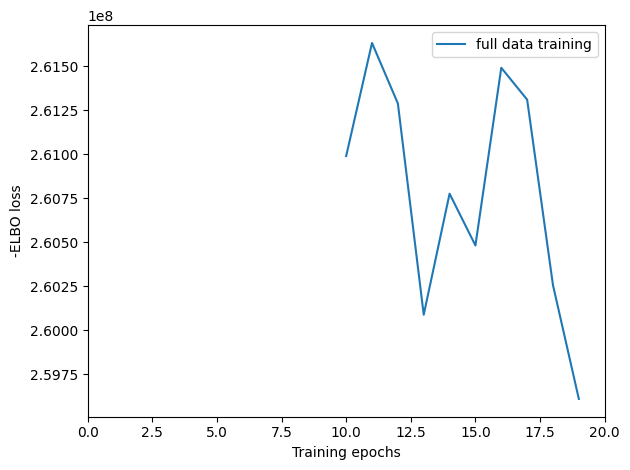

In [26]:
mod.plot_history(10)
plt.legend(labels=['full data training'])

In [28]:
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 10, 'batch_size': mod.adata.n_obs}
)

# Save model
mod.save(f"{run_name}", overwrite=True)
adata_file = f"{run_name}/sp.h5ad"
adata_vis.write(adata_file)

Sampling global variables, sample: 100%|█████████████████████████████████████████████████| 9/9 [01:02<00:00,  6.98s/it]


In [29]:
adata_vis

AnnData object with n_obs × n_vars = 152273 × 4281
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'tissue_cluster', 'tissue', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'n_counts', 'mean_umi', 'MT_gene', 'external_gene_name'
    uns: 'bin_size', 'bin_type', 'resolution', 'sn', 'tissue_cluster_colors', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

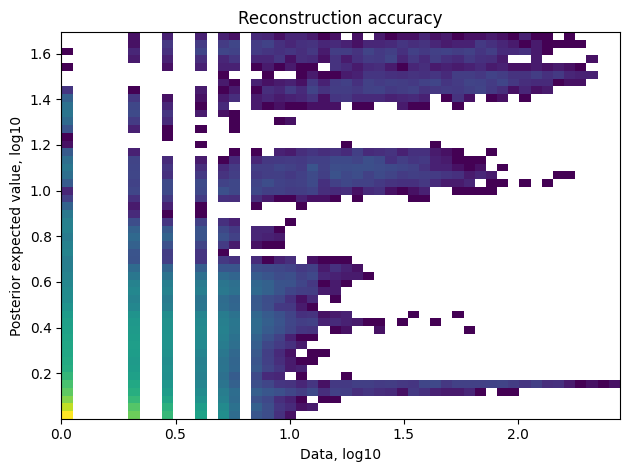

In [30]:
#训练的少模型的一致性非常差
mod.plot_QC()

## Visualising cell abundance in spatial coordinates

In [31]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf']

In [32]:
adata_vis

AnnData object with n_obs × n_vars = 152273 × 4281
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'tissue_cluster', 'tissue', '_indices', '_scvi_batch', '_scvi_labels', 'Corticotrophs', 'Endothelial cells', 'Folliculo-stellate cellsc', 'Gonadotrophs', 'Lactotrophs', 'Red blood cells', 'Thyrotrophs', 'White blood cells', 'immune cells'
    var: 'n_cells', 'n_counts', 'mean_umi', 'MT_gene', 'external_gene_name'
    uns: 'bin_size', 'bin_type', 'resolution', 'sn', 'tissue_cluster_colors', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'spatial', 'MT', 'means_cell_abundance_w_sf', 'stds_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf'

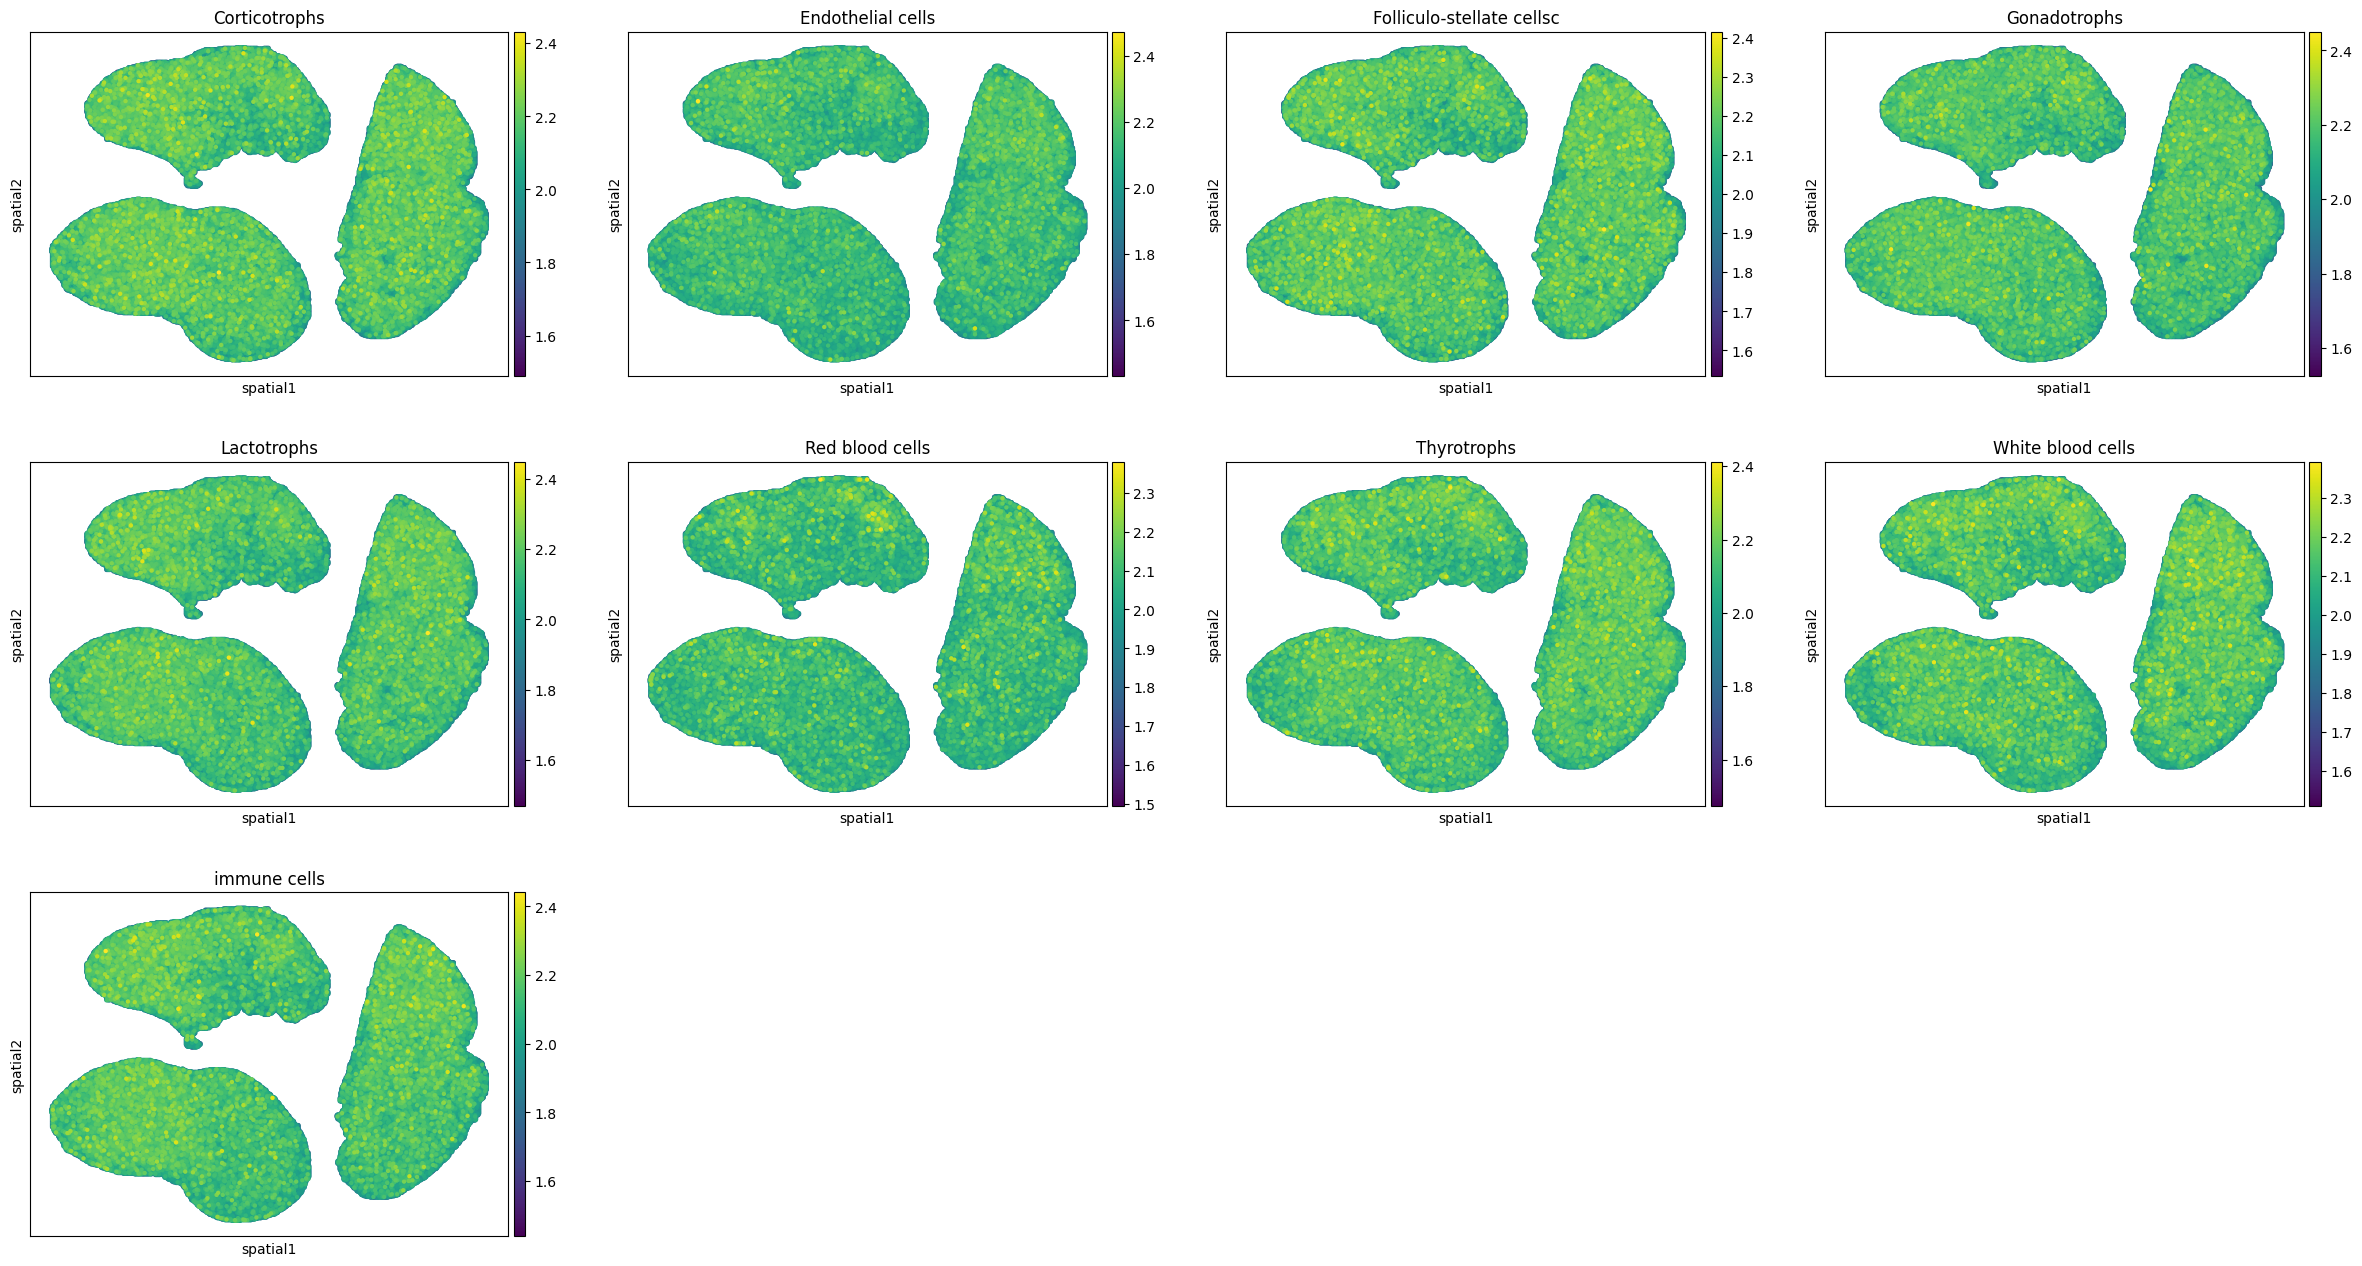

In [33]:
sc.pl.embedding(adata_vis, color=['Corticotrophs', 'Endothelial cells', 'Folliculo-stellate cellsc', 'Gonadotrophs', 'Lactotrophs', 'Red blood cells', 'Thyrotrophs', 'White blood cells', 'immune cells'], basis="spatial", size=40)